In [321]:
import numpy as np


In [322]:
# %conda install -y ipywidgets

In [323]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [324]:
import numpy as np
from vae.arch_custommazelightk3conv4 import VAE
import matplotlib.pyplot as plt
import os
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from tensorflow.keras.utils import plot_model

np.set_printoptions(precision=4, suppress = True)

In [325]:
# vae1 = VAE()
# vae1.set_weights('./vae/weights_custommaze10000.1.ckpt')
from vae.arch_custommazegray2z32k3conv4 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_gray25000.5z32k3conv3r100000.ckpt')
#conv3って書いてあるけどconv4

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
observation_input (InputLayer)  [(None, 80, 80, 1)]  0                                            
__________________________________________________________________________________________________
conv_layer_1 (Conv2D)           (None, 40, 40, 3)    30          observation_input[0][0]          
__________________________________________________________________________________________________
conv_layer_2 (Conv2D)           (None, 20, 20, 32)   896         conv_layer_1[0][0]               
__________________________________________________________________________________________________
conv_layer_3 (Conv2D)           (None, 10, 10, 64)   18496       conv_layer_2[0][0]               
____________________________________________________________________________________________

/home/shun/miniconda3/envs/env_GDL4/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [326]:
# from tensorflow.keras.models import Model

In [327]:
# vae=load_model('./vae/')

In [328]:
DIR_NAME = './data/custom2dmaze_gray2/'
file = os.listdir(DIR_NAME)[5]
print(file)
obs_data = np.load(DIR_NAME + file)['obs']
print(obs_data.shape)

1618366556.npz
(1000, 80, 80, 1)


In [329]:
# file = os.listdir(DIR_NAME)[20]#あるエピソード取り出す
# obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)

# fig_width = 14  # Adjust this value as needed
# fig_height = 7  # Adjust this value as needed

# # Initialize the figure with the desired size
# plt.figure(figsize=(fig_width, fig_height))
# for idx in range(500,900,1):
#     plt.gca().cla() 
    
#     obs = obs_data3[idx]
#     z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
#     # z_decoded1を保存するファイル名
#     # save_file = f'./vae/decoded1/z_decoded1_data{idx}.npz'
#     # z_decoded1をNumPyの配列に変換
#     # z_decoded1_array = np.array(z_decoded1)
#     # # z_decoded1をnpz形式で保存
#     # np.savez(save_file, z_decoded1_array=z_decoded1_array)
#     plt.subplot(121)
#     plt.imshow( obs[:,:,0])
#     plt.subplot(122)
#     plt.imshow( z_decoded1[:,:,0])
    
# #     plt.show()
#     display.clear_output(wait=True)
#     display.display(plt.gcf()) 
#     print(idx)
    

In [330]:
# filelist = os.listdir(DIR_NAME)
# filelist = [x for x in filelist if x != '.DS_Store']
# filelist.sort()

In [331]:
# %conda install -y graphviz

In [332]:
# plot_model(vae.encoder, to_file='./vae/encoder.png', show_shapes=True)
# plot_model(vae.decoder, to_file='./vae/decoder.png', show_shapes=True)


In [333]:
# plot_model(vae.encoder, to_file='./vae/encoder.png', show_shapes=True)

In [334]:
# vae1 = VAE()
# vae1.set_weights('./vae/weights_custommaze10000.1.ckpt')

In [335]:
file = os.listdir(DIR_NAME)[1]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[90]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)
obs

array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], dtype=float32)

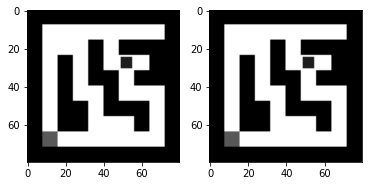

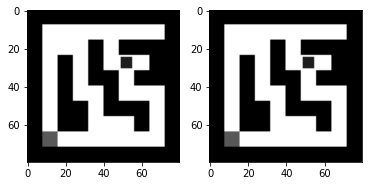

In [336]:
from vae.arch_custommazegray2z32k3conv4 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_gray25000.5z32k3conv3r100000.ckpt')
#conv3って書いてあるけどconv4
file = os.listdir(DIR_NAME)[990]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[884]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)
print(obs.shape)
z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
print(z_decoded1.shape)
plt.subplot(121)
plt.imshow( obs[:,:,0],cmap='gray')
plt.subplot(122)
plt.imshow( z_decoded1[:,:,0],cmap='gray')
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


In [337]:
print(z_decoded1.shape)

(80, 80, 1)


In [338]:
# vae2 = VAE()
# vae2.set_weights('./vae/weights1.1rand3.ckpt')

In [339]:
np.array([obs]).shape

(1, 80, 80, 1)

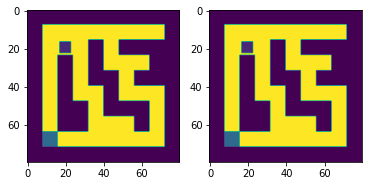

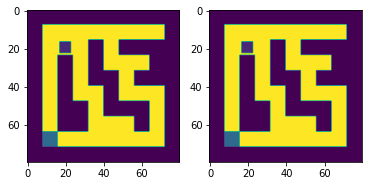

In [340]:
file = os.listdir(DIR_NAME)[19]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[90]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)

z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded1[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


In [341]:
# vae3 = VAE()
# vae3.set_weights('./vae/weights1.1rand3.ckpt')

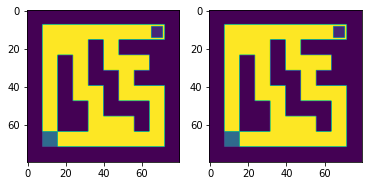

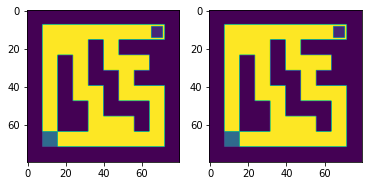

In [342]:

obs = obs_data3[0]
z_decoded = vae1.full_model.predict(np.array([obs]))[0]
    
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 

In [343]:
# vae3 = VAE()
# vae3.set_weights('./vae/weights200.20804.h5')

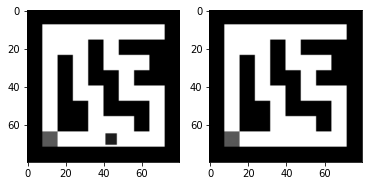

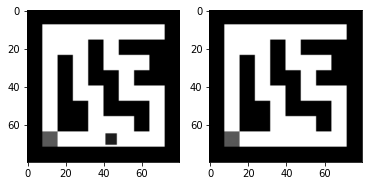

In [344]:
from vae.arch_custommazegray2z32k3conv4 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_gray25000.5z32k3conv3r100000.ckpt')
#conv3って書いてあるけどconv4
file = os.listdir(DIR_NAME)[60]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[178]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)

z_decoded3 = vae1.full_model.predict(np.array([obs]))[0]
    
plt.subplot(121)
plt.imshow( obs[:,:,0],cmap='gray')
plt.subplot(122)
plt.imshow( z_decoded3[:,:,0],cmap='gray')
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


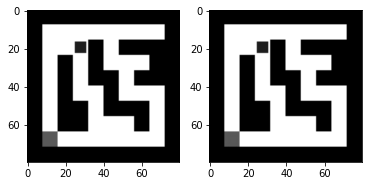

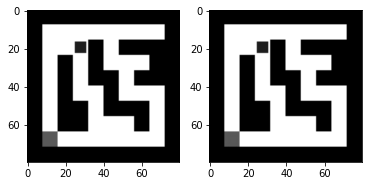

In [345]:

file = os.listdir(DIR_NAME)[20]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[364]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)
print(obs.shape)
z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
print(z_decoded1.shape)
plt.subplot(121)
plt.imshow( obs[:,:,0],cmap='gray')
plt.subplot(122)
plt.imshow( z_decoded1[:,:,0],cmap='gray')
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


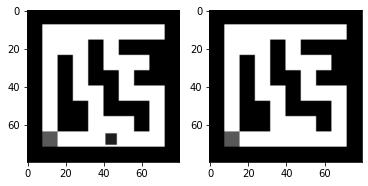

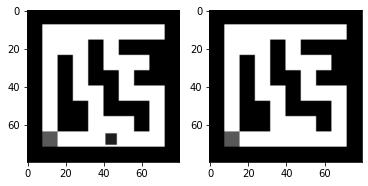

In [346]:

file = os.listdir(DIR_NAME)[60]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[178]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)

z_decoded3 = vae1.full_model.predict(np.array([obs]))[0]
    
plt.subplot(121)
plt.imshow( obs[:,:,0],cmap='gray')
plt.subplot(122)
plt.imshow( z_decoded3[:,:,0],cmap='gray')
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


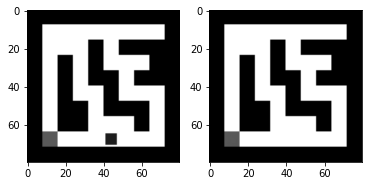

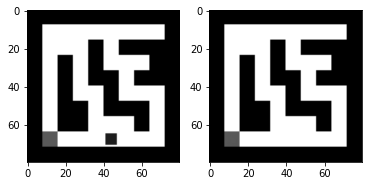

In [347]:

file = os.listdir(DIR_NAME)[60]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[178]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)

z_decoded3 = vae1.full_model.predict(np.array([obs]))[0]
    
plt.subplot(121)
plt.imshow( obs[:,:,0],cmap='gray')
plt.subplot(122)
plt.imshow( z_decoded3[:,:,0],cmap='gray')
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


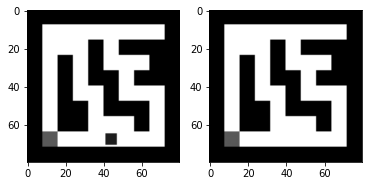

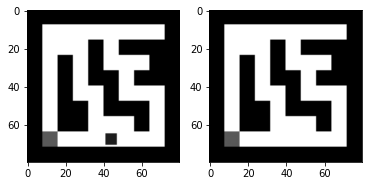

In [348]:

file = os.listdir(DIR_NAME)[60]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[178]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)

z_decoded3 = vae1.full_model.predict(np.array([obs]))[0]
    
plt.subplot(121)
plt.imshow( obs[:,:,0],cmap='gray')
plt.subplot(122)
plt.imshow( z_decoded3[:,:,0],cmap='gray')
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


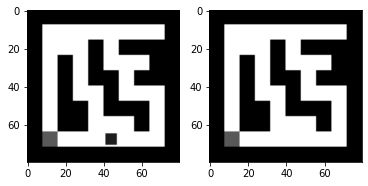

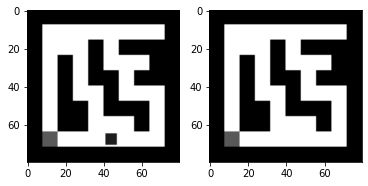

In [349]:
from vae.arch_custommazegray2z32k3conv4 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_gray25000.5z32k3conv3r100000.ckpt')
#conv3って書いてあるけどconv4
file = os.listdir(DIR_NAME)[60]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[178]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)

z_decoded3 = vae1.full_model.predict(np.array([obs]))[0]
    
plt.subplot(121)
plt.imshow( obs[:,:,0],cmap='gray')
plt.subplot(122)
plt.imshow( z_decoded3[:,:,0],cmap='gray')
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


In [350]:

# file = os.listdir(DIR_NAME)[20]#あるエピソード取り出す
# obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)

# fig_width = 14  # Adjust this value as needed
# fig_height = 7  # Adjust this value as needed

# # Initialize the figure with the desired size
# plt.figure(figsize=(fig_width, fig_height))
# for idx in range(300,900,2):
#     plt.gca().cla() 
    
#     obs = obs_data3[idx]
#     z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
#     # z_decoded1を保存するファイル名
#     # save_file = f'./vae/decoded1/z_decoded1_data{idx}.npz'
#     # z_decoded1をNumPyの配列に変換
#     # z_decoded1_array = np.array(z_decoded1)
#     # # z_decoded1をnpz形式で保存
#     # np.savez(save_file, z_decoded1_array=z_decoded1_array)
#     plt.subplot(121)
#     plt.imshow( obs[:,:,0])
#     plt.subplot(122)
#     plt.imshow( z_decoded1[:,:,0])
    
# #     plt.show()
#     display.clear_output(wait=True)
#     display.display(plt.gcf()) 
#     print(idx)
    
   





In [351]:
# filelist = os.listdir('./vae/decoded1')
# filelist = [x for x in filelist if (x != '.DS_Store' and x!='.gitignore')]
# # filelist.sort()
# length_filelist = len(filelist)
# sorted_names = sorted(filelist, key=lambda name: int(''.join(filter(str.isdigit, name))))

In [352]:
import time

In [353]:
# im_datas=[]
# for i in range(300):
#     im_data = np.load(f'./vae/decoded1/{sorted_names[i]}')
    
#     im_datas.append(im_data['z_decoded1_array'])
    
#     plt.gca().cla() 
#     plt.imshow(im_datas[i])
    
    
#     time.sleep(0.3)
#     display.clear_output(wait=True)
#     display.display(plt.gcf()) 
    
#     print(i)

In [354]:
# ### output from the full_model
# DIR_NAME = './data/custom2dmaze_rollout3/'
# file = os.listdir(DIR_NAME)[17]#あるエピソード取り出す
# obs_data = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データをとりだす(300,64,64,3)

# obs = obs_data[4]#1ステップ時間の観測(1,64,64,3)

# reconstruction = vae1.full_model.predict(np.array([obs]))[0]

# ax1 = plt.subplot(121)
# plt.imshow( obs[:,:,0])
# ax1.axis('off')
# ax1.text(0.5,-0.1, "INPUT", size=12, ha="center", 
#          transform=ax1.transAxes)

# ax2 = plt.subplot(122)
# plt.imshow( reconstruction)
# ax2.axis('off')
# ax2.text(0.5,-0.1, "OUTPUT", size=12, ha="center", 
#          transform=ax2.transAxes);


In [355]:
np.array([obs]).shape

(1, 80, 80, 1)

In [356]:
mus, log_vars, _  = vae1.encoder.predict(np.array([obs]))#特定の観測　(1, 64, 64, 3)を与える
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

encoded_z = vae1.encoder.predict(np.array([obs]))[2]
print("z = " + str(encoded_z))

mu = [-0.0114 -0.0009  0.0779 -0.1566 -0.0339 -0.0104 -0.0162  0.038  -0.0839
 -0.0291  0.0306 -0.0989  0.339  -0.0336 -0.126   0.0177  0.1752 -0.3862
  0.0559  0.001   0.0136 -0.0098  0.0398  0.0076 -0.015  -0.0428 -0.0162
 -0.0283 -0.1069 -0.0097 -0.3289 -0.108 ]
log_var = [-0.0367 -1.3798  0.0067 -1.661  -0.089  -0.075   0.0139 -0.0225 -0.13
 -0.0035 -0.0292 -1.1076 -1.0759  0.0155 -1.8996 -0.0353 -1.2589 -1.5038
 -0.0272 -0.058  -0.0572 -0.648  -0.0942 -0.0495  0.0119 -0.0219 -1.7791
 -1.5182 -1.1649 -0.0114 -1.5992 -1.3222]
z = [[ 0.0163 -0.4551 -2.0059  0.2882  0.3659 -1.3432 -0.1335  1.1053  0.4051
   0.75   -0.5666 -0.2529  0.7386  0.2695 -0.3515  0.4542 -0.8644 -1.0552
  -0.5131  0.5457  0.0502 -0.9907 -0.3072  0.5238  1.1827  0.9637  0.2125
   0.6365 -0.342  -0.6841 -0.671  -0.1826]]


In [357]:
# mus, log_vars, _  = vae1.encoder.predict(np.array([obs]))#特定の観測　(1, 64, 64, 3)を与える
# mu = mus[0]
# log_var = log_vars[0]
# print("mu = " + str(mu))
# print("log_var = " + str(log_var))

encoded_z = vae1.encoder.predict(np.array([obs]))
print("z = " + str(encoded_z))

z = [array([[-0.0114, -0.0009,  0.0779, -0.1566, -0.0339, -0.0104, -0.0162,
         0.038 , -0.0839, -0.0291,  0.0306, -0.0989,  0.339 , -0.0336,
        -0.126 ,  0.0177,  0.1752, -0.3862,  0.0559,  0.001 ,  0.0136,
        -0.0098,  0.0398,  0.0076, -0.015 , -0.0428, -0.0162, -0.0283,
        -0.1069, -0.0097, -0.3289, -0.108 ]], dtype=float32), array([[-0.0367, -1.3798,  0.0067, -1.661 , -0.089 , -0.075 ,  0.0139,
        -0.0225, -0.13  , -0.0035, -0.0292, -1.1076, -1.0759,  0.0155,
        -1.8996, -0.0353, -1.2589, -1.5038, -0.0272, -0.058 , -0.0572,
        -0.648 , -0.0942, -0.0495,  0.0119, -0.0219, -1.7791, -1.5182,
        -1.1649, -0.0114, -1.5992, -1.3222]], dtype=float32), array([[-0.3907, -0.4353, -0.2176, -0.6193,  0.2799,  1.1202,  1.9273,
         0.0719, -0.3902, -1.0546, -0.8947,  0.5548,  1.1174,  0.5957,
        -0.2203,  0.7583, -0.5139,  0.6286, -0.3826,  0.1605,  0.6281,
         0.4514, -1.3776, -0.1844, -0.8139, -0.925 ,  0.0367, -0.7293,
         0.7242, -1

In [358]:
print(vae1.encoder.predict(np.array([obs])))

[array([[-0.0114, -0.0009,  0.0779, -0.1566, -0.0339, -0.0104, -0.0162,
         0.038 , -0.0839, -0.0291,  0.0306, -0.0989,  0.339 , -0.0336,
        -0.126 ,  0.0177,  0.1752, -0.3862,  0.0559,  0.001 ,  0.0136,
        -0.0098,  0.0398,  0.0076, -0.015 , -0.0428, -0.0162, -0.0283,
        -0.1069, -0.0097, -0.3289, -0.108 ]], dtype=float32), array([[-0.0367, -1.3798,  0.0067, -1.661 , -0.089 , -0.075 ,  0.0139,
        -0.0225, -0.13  , -0.0035, -0.0292, -1.1076, -1.0759,  0.0155,
        -1.8996, -0.0353, -1.2589, -1.5038, -0.0272, -0.058 , -0.0572,
        -0.648 , -0.0942, -0.0495,  0.0119, -0.0219, -1.7791, -1.5182,
        -1.1649, -0.0114, -1.5992, -1.3222]], dtype=float32), array([[ 0.1229, -0.1127, -0.1922, -0.0518,  1.1721, -0.7176,  1.3033,
        -2.2083,  0.3316,  1.1079,  0.5087, -1.3458,  0.6818, -1.0406,
        -0.5176,  1.4503,  0.6614, -0.1657,  0.7272, -1.3063, -0.4433,
         0.7846,  0.7415, -0.1157,  0.388 , -1.0424,  0.4887,  0.0445,
        -0.6586, -1.561

In [359]:
encoded_z = vae1.encoder.predict(np.array([obs]))
print("z = " + str(encoded_z))

z = [array([[-0.0114, -0.0009,  0.0779, -0.1566, -0.0339, -0.0104, -0.0162,
         0.038 , -0.0839, -0.0291,  0.0306, -0.0989,  0.339 , -0.0336,
        -0.126 ,  0.0177,  0.1752, -0.3862,  0.0559,  0.001 ,  0.0136,
        -0.0098,  0.0398,  0.0076, -0.015 , -0.0428, -0.0162, -0.0283,
        -0.1069, -0.0097, -0.3289, -0.108 ]], dtype=float32), array([[-0.0367, -1.3798,  0.0067, -1.661 , -0.089 , -0.075 ,  0.0139,
        -0.0225, -0.13  , -0.0035, -0.0292, -1.1076, -1.0759,  0.0155,
        -1.8996, -0.0353, -1.2589, -1.5038, -0.0272, -0.058 , -0.0572,
        -0.648 , -0.0942, -0.0495,  0.0119, -0.0219, -1.7791, -1.5182,
        -1.1649, -0.0114, -1.5992, -1.3222]], dtype=float32), array([[-0.5651,  0.3036,  0.6621,  0.4534, -0.4861, -1.5258, -0.1714,
        -0.5174, -1.1573,  0.3346,  1.5441, -0.4672,  0.3577, -1.3525,
        -0.5883,  2.6264, -0.1549, -0.2956, -1.0256, -0.8171,  0.3992,
        -1.2681, -1.6668, -0.005 , -0.2686, -0.8231,  0.8058,  0.3848,
        -0.1682, -0

informative dimensions:


array([ 1,  3,  8, 11, 12, 14, 16, 17, 21, 26, 27, 28, 30, 31])

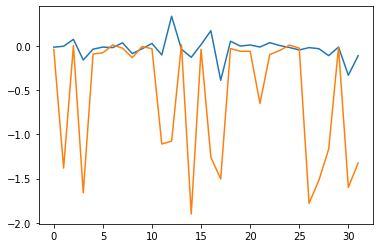

In [360]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs1 = np.where(abs(log_var) > 0.1)[0]
hot_zs1

informative dimensions:


array([], dtype=int64)

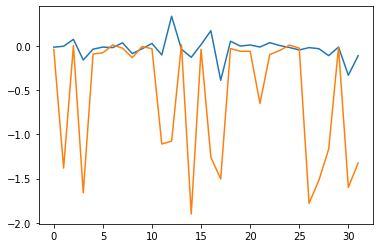

In [361]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs = np.where(abs(log_var) > 2)[0]
hot_zs

In [362]:
file1 = os.listdir(DIR_NAME)[100]
obs_data1 = np.load(DIR_NAME + file)['obs']
file2 = os.listdir(DIR_NAME)[140]
obs_data2 = np.load(DIR_NAME + file)['obs']

In [363]:
a=vae1.encoder.predict(np.array([obs_data1[20]]))[0]
a.shape

(1, 32)

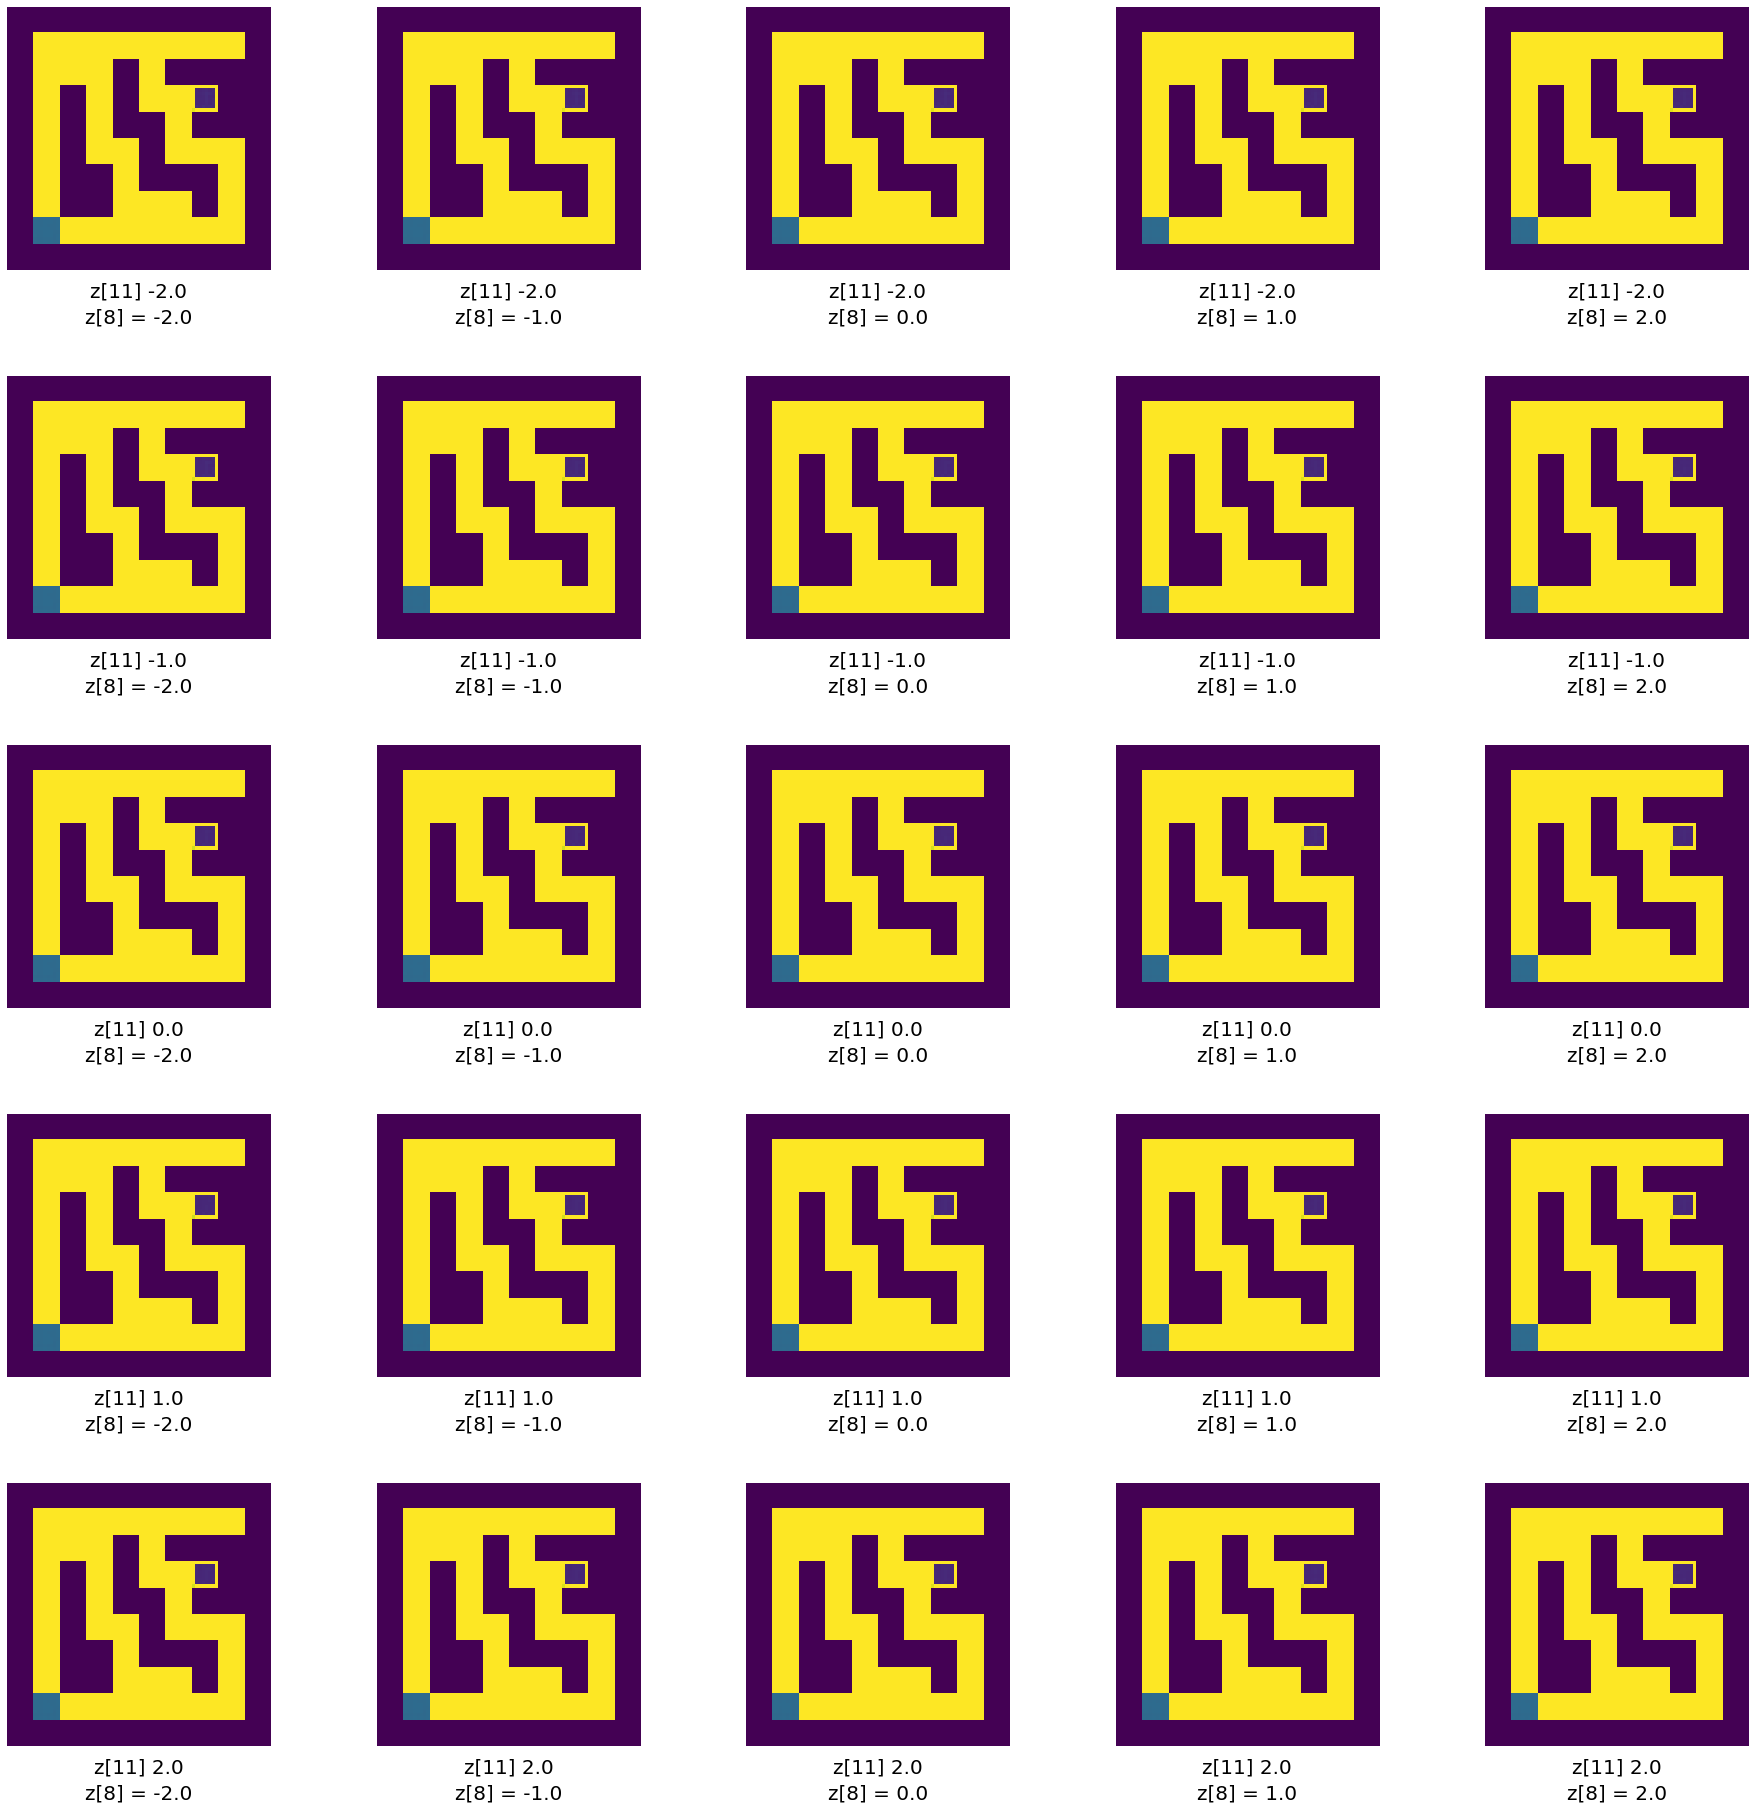

In [364]:
top_left = vae1.encoder.predict(np.array([obs_data1[20]]))[2][0]
top_right = vae1.encoder.predict(np.array([obs_data1[60]]))[2][0]
bottom_left = vae1.encoder.predict(np.array([obs_data2[80]]))[2][0]
sample_z = vae1.encoder.predict(np.array([obs_data[60]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[11] = (x-2)
        z[8] = (y-2)
        
        decoded_obs = vae1.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs[:,:,0])
        
        axes[x,y].text(0.5,-0.1, 'z[11] ' + str(np.round(z[11],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[8] = ' + str(np.round(z[8],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

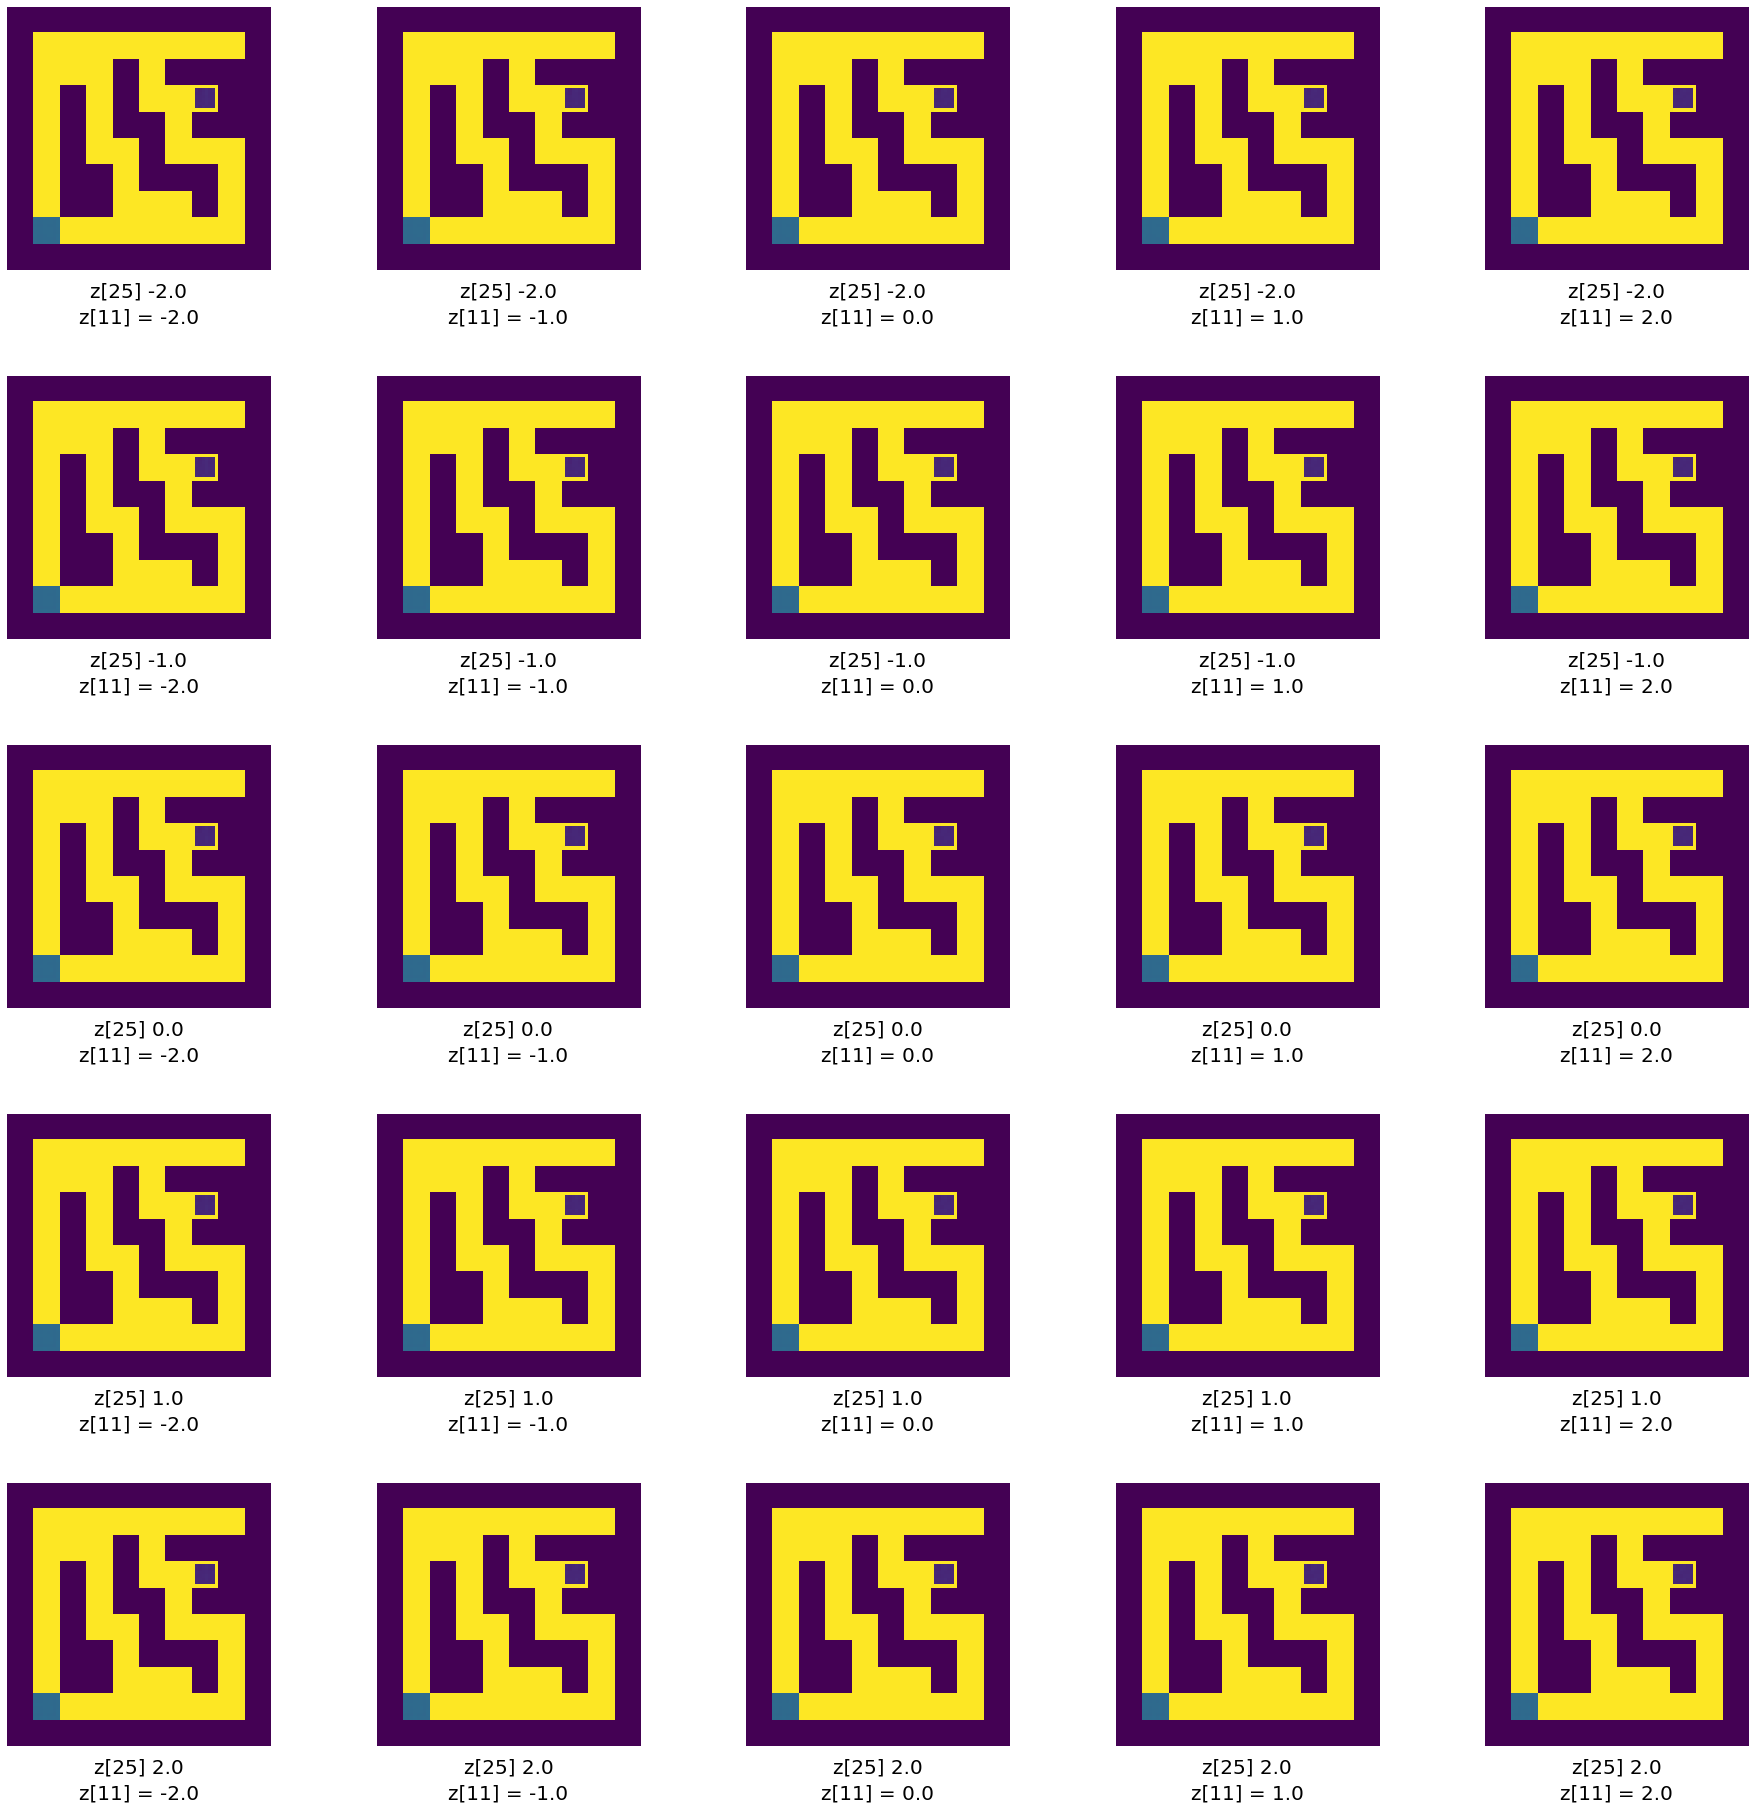

In [365]:
top_left = vae1.encoder.predict(np.array([obs_data1[20]]))[2][0]
top_right = vae1.encoder.predict(np.array([obs_data1[60]]))[2][0]
bottom_left = vae1.encoder.predict(np.array([obs_data1[80]]))[2][0]

sample_z = vae1.encoder.predict(np.array([obs_data[60]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)


for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[25] = (x-2)
        z[11] = (y-2)
        
        decoded_obs = vae1.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs[:,:,0])
        
        axes[x,y].text(0.5,-0.1, 'z[25] ' + str(np.round(z[25],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[11] = ' + str(np.round(z[11],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

In [366]:
top_left = vae3.encoder.predict(np.array([obs_data1[20]]))[2][0]
top_right = vae3.encoder.predict(np.array([obs_data1[60]]))[2][0]
bottom_left = vae3.encoder.predict(np.array([obs_data2[80]]))[2][0]

sample_z = vae3.encoder.predict(np.array([obs_data[60]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[13] = (x-2)
        z[22] = (y-2)
        
        decoded_obs = vae3.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs)
        
        axes[x,y].text(0.5,-0.1, 'z[13] ' + str(np.round(z[13],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[22] = ' + str(np.round(z[22],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

NameError: name 'vae3' is not defined

In [ ]:
decoded_obs

array([[[0.5002, 0.4998, 0.4999],
        [0.4998, 0.4996, 0.4999],
        [0.4997, 0.4998, 0.5004],
        ...,
        [0.5004, 0.5001, 0.5001],
        [0.5005, 0.5003, 0.5003],
        [0.4998, 0.5001, 0.4998]],

       [[0.5003, 0.4999, 0.5002],
        [0.5001, 0.5002, 0.4997],
        [0.5   , 0.4998, 0.4998],
        ...,
        [0.5003, 0.5   , 0.4998],
        [0.5002, 0.5002, 0.5003],
        [0.4999, 0.5   , 0.4998]],

       [[0.5001, 0.4999, 0.5001],
        [0.4998, 0.4996, 0.5   ],
        [0.5002, 0.4996, 0.5   ],
        ...,
        [0.4998, 0.5005, 0.5   ],
        [0.5001, 0.5004, 0.4999],
        [0.4999, 0.4997, 0.5002]],

       ...,

       [[0.4996, 0.5003, 0.5003],
        [0.4998, 0.5001, 0.499 ],
        [0.4998, 0.5003, 0.5006],
        ...,
        [0.5006, 0.4993, 0.4987],
        [0.5002, 0.5013, 0.5008],
        [0.5001, 0.5001, 0.4993]],

       [[0.5004, 0.4993, 0.4997],
        [0.4996, 0.5   , 0.4994],
        [0.5009, 0.4992, 0.5004],
        .

In [ ]:
def play_with_z(z0 = sample_z[0]
                ,z2 = sample_z[2]
                ,z4 = sample_z[4]
                ,z5 = sample_z[5]
                ,z6 = sample_z[6]
                ,z7 = sample_z[7]
                ,z8 = sample_z[8]
                ,z10 = sample_z[10]
                ,z13 = sample_z[13]
                ,z15 = sample_z[15]
                ,z24= sample_z[24]
                ,z25= sample_z[25]
                ,z26= sample_z[26]
                ,z27= sample_z[27]
                ):
    z = sample_z.copy()
    z[0] = z0
    z[2] = z2
    z[4] = z4
    z[5] = z5
    z[6] = z6
    z[7] = z7
    z[8] = z8
    z[10] = z10
    z[13] = z13
    z[15] = z15
    z[24] = z24
    z[25] = z25
    z[26] = z26
    z[27] = z27
    
    decoded_obs = vae1.decoder.predict(np.array([z]))[0]
    plt.gca().cla() 
    plt.imshow( decoded_obs)

In [ ]:
interact(play_with_z
        , z0=(-3.0,3.0,0.1)
        , z2=(-3.0,3.0,0.1)
        , z4=(-3.0,3.0,0.1)
        , z5=(-3.0,3.0,0.1)
        , z6=(-3.0,3.0,0.1)
        , z7=(-3.0,3.0,0.1)
        , z8=(-3.0,3.0,0.1)
        , z10=(-3.0,3.0,0.1)
        , z13=(-3.0,3.0,0.1)
        , z15=(-3.0,3.0,0.1)
        , z24=(-3.0,3.0,0.1)
        , z25=(-3.0,3.0,0.1)
        , z26=(-3.0,3.0,0.1)
        , z27=(-3.0,3.0,0.1)
        )

interactive(children=(FloatSlider(value=-0.7293716073036194, description='z0', max=3.0, min=-3.0), FloatSlider…

<function __main__.play_with_z(z0=-0.7293716, z2=-1.5487323, z4=0.03945683, z5=-0.81787795, z6=0.71974146, z7=0.9768293, z8=0.714299, z10=-0.65156126, z13=-1.3383039, z15=0.9658649, z24=0.70276463, z25=-0.46953642, z26=0.21323122, z27=-0.19417028)>

In [ ]:
vae.full_model.summary()

Model: "vae_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Model)              [(None, 32), (None, 32),  264032    
_________________________________________________________________
decoder (Model)              (None, 64, 64, 3)         1851939   
Total params: 2,115,971
Trainable params: 2,115,971
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mus, log_vars, _  = vae2.encoder.predict(np.array([obs]))#特定の観測　(1, 64, 64, 3)を与える
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

encoded_z = vae2.encoder.predict(np.array([obs]))[2]
print("z = " + str(encoded_z))

mu = [-0.017   1.0687  0.0068 -0.0073 -0.0004 -0.0213  0.0033  0.024   0.0079
  0.0035 -0.0131  0.0011 -0.015  -0.0092  0.0047  0.0038 -0.0126 -0.0023
  0.0115 -0.0105  0.0001 -0.8742 -0.0073 -0.0113 -0.0019 -0.009   0.0036
 -0.0084 -0.0062 -0.0101  0.0079 -0.0058]
log_var = [-0.005  -3.2656  0.0012 -0.0064 -0.0832 -0.0067  0.0038  0.0007 -0.0115
  0.0037  0.0165 -0.0034 -0.004  -0.0111 -0.0069 -0.0027 -0.0044  0.0076
 -0.0005 -0.1436  0.0058 -0.9116  0.0098 -0.0025  0.0009  0.006  -0.0126
 -0.0026 -0.0077 -0.0043 -0.0074  0.0064]
z = [[ 0.7776  1.1109 -0.3628 -0.4584  1.5002  1.0793 -1.1028  0.5392 -0.3817
  -0.1768 -0.961  -1.1162 -1.0017  0.8331  0.1124 -0.7831  0.4714 -1.2231
   1.0771  0.4763  1.2822 -1.8684  0.513  -2.0841  0.3737 -0.3046  0.1204
   0.726   1.7934  0.2073  0.259  -0.0664]]


informative dimensions:


array([ 1, 19, 21])

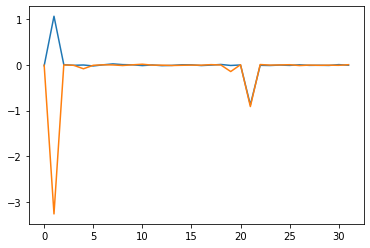

In [ ]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs1 = np.where(abs(log_var) > 0.1)[0]
hot_zs1